In [1]:
# Importando o pandas
import pandas as pd

In [3]:
# Importando o dataset de treino
treino = pd.read_csv(r'C:\Users\vsg99\Downloads\Completo\house\train.csv')

In [5]:
# Visualizando essa base
treino.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [7]:
# Retornando o shape da base
treino.shape

(1460, 81)

In [9]:
# E as informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

In [19]:
# Visualizando quantidade de valores vazios
treino.isnull().sum().sort_values(ascending=False)[treino.isnull().sum()>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [35]:
# Podemos eliminar as colunas com mais de 10% de valores vazios
col_eliminar = (treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False)[(treino.isnull().sum()/treino.shape[0]) > 0.1].index

In [42]:
# Eliminando essas colunas
treino.drop(col_eliminar, axis=1, inplace=True)

- Queremos criar um primeiro modelo para verificar o quanto estamos errando e depois planejar como melhorar. Para isso:
    - Precisamos **retirar os valores vazios**
    - Vamos **eliminar as colunas de texto**
    - Vamos **escolher alguns algoritmos para testar e um método de avaliação de erro**

In [52]:
# Retirando os valores vazios
treino.fillna(-1, inplace=True)

In [54]:
# Verificando novamente as informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [64]:
# Agora selecionando apenas as colunas numéricas
col_nr = treino.dtypes[treino.dtypes != 'object'].index

In [70]:
# E criar uma nova base com esses valores
treino = treino[col_nr]

In [72]:
treino.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


- Essa será nossa base inicial para começar

## Criando nosso modelo

- **Vamos separar em treino e teste**
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [74]:
# Selecionando X e y
X = treino.drop('SalePrice', axis=1)
y = treino.SalePrice

In [76]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [78]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **O próximo passo é selecionar os algoritmos que vamos utilizar. Podemos começar com os algoritmos mais simples como:**
    - Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [80]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [82]:
# Criando o regressor e fazendo o fit com os dados de treino
reg = LinearRegression().fit(X_train, y_train)

In [90]:
# Fazendo a previsão pros dados de teste
y_pred_reg = reg.predict(X_test)

In [92]:
# Importando a árvore de regressão
from sklearn import tree

In [94]:
# Criando o regressor e fazendo o fit com os dados de treino
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [96]:
# Fazendo a previsão
y_pred_clf = clf.predict(X_test)

In [100]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [102]:
# Criando o regressor e fazendo o fit com os dados de treino
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [104]:
# Fazendo a previsão
y_pred_knn = neigh.predict(X_test)

- **E avaliar esses dados, utilizando tanto o erro absoluto quanto o quadrático:**
    - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [106]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [108]:
# E o erro quadrático 
from sklearn.metrics import mean_squared_error

In [116]:
# Avaliando o erro da regressão
print(mean_absolute_error(y_test, y_pred_reg))
print(mean_squared_error(y_test, y_pred_reg))

23763.18739306386
1533982883.4448688


In [118]:
# da árvore de decisão
print(mean_absolute_error(y_test, y_pred_clf))
print(mean_squared_error(y_test, y_pred_clf))

27834.058091286308
2560770081.925311


In [120]:
# e do knn
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


- **Podemos plotar visualmente a relação do y_test com as previsões feitas**
    - Para isso vamos utilizar o matplotlib
        - https://matplotlib.org/

In [122]:
# Importando o matplotlib
import matplotlib.pyplot as plt

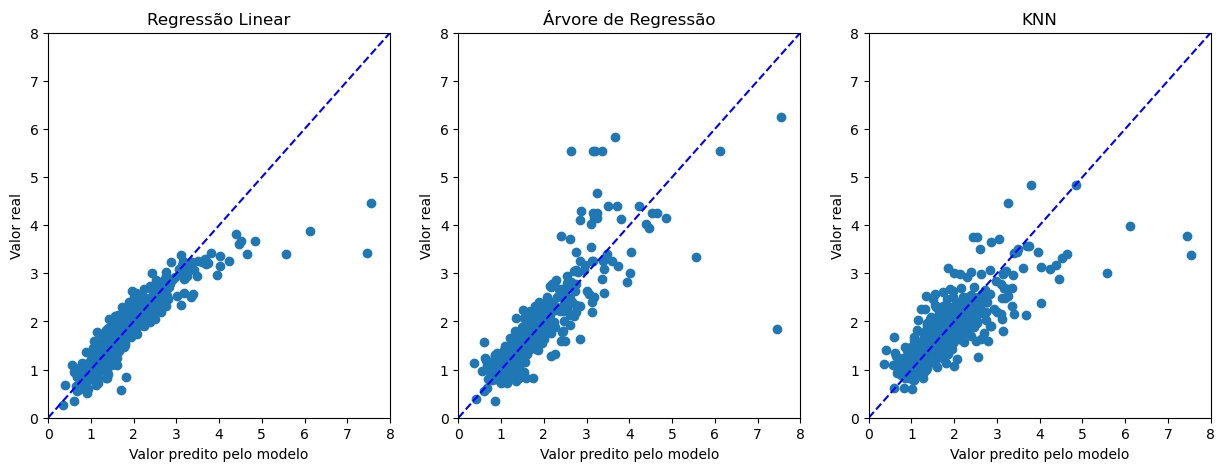

In [169]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_reg/100000)
ax[0].plot([0,8], [0,8], '--b')
ax[0].set_xlabel('Valor predito pelo modelo')
ax[0].set_ylabel('Valor real')
ax[0].set_title('Regressão Linear')
ax[0].set(xlim=(0, 8), ylim=(0, 8))

ax[1].scatter(y_test/100000, y_pred_clf/100000)
ax[1].plot([0,8], [0,8], '--b')
ax[1].set_title('Árvore de Regressão')
ax[1].set_xlabel('Valor predito pelo modelo')
ax[1].set_ylabel('Valor real')
ax[1].set(xlim=(0, 8), ylim=(0, 8))

ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8], [0,8], '--b')
ax[2].set_title('KNN')
ax[2].set_xlabel('Valor predito pelo modelo')
ax[2].set_ylabel('Valor real')
ax[2].set(xlim=(0, 8), ylim=(0, 8))

plt.show()

- **Vamos utilizar a Regressão Linear por ter sido o algoritmo com menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle na hora de classificar os modelos**

## Fazendo a previsão para a base de teste da competição

In [171]:
# Importando a base de teste
teste = pd.read_csv(r'C:\Users\vsg99\Downloads\Completo\house\test.csv')

In [173]:
# Visualizando a base
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


- **Agora vamos repetir os mesmos tratamentos que fizemos na base de treino**
    - Obs: **não podemos excluir linhas**

In [175]:
# Eliminando as mesmas colunas da base de treino
teste.drop(col_eliminar, axis=1, inplace=True)

In [187]:
# Verificando as colunas numéricas
col_nr2 = teste.dtypes[teste.dtypes != 'object'].index

In [191]:
# Mantendo também apenas as colunas numéricas
teste = teste[col_nr2]

In [195]:
# Verificando a base restante
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [201]:
# Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False)[teste.isnull().sum()>0]

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

- **Podemos alterar todos esses valores vazios por -1**
    - Não vai ser confundido com o zero
    - Depois conseguimos retornar de forma fácil os valores que fizemos esse ajuste

In [209]:
# Trocando todos os valores vazios por -1
teste = teste.fillna(-1)

In [213]:
# Visualizando quantidade de valores vazios
teste.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

- **Agora podemos usar nosso modelo e ajustar os dados para usarmos no Kaggle**

In [215]:
# Vamos usar a Regressão Linear para fazer a previsão
y_pred_reg = reg.predict(teste)

In [217]:
# Podemos adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred_reg

In [221]:
# E extrair somente o Id e o SalePrice
base_kaggle = teste[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [225]:
# Podemos então exportar essa base
base_kaggle.to_csv('resultado-kaggle.csv', index=False)